In [1]:
from PIL import Image, ImageDraw, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from PIL import ImageOps
from sklearn.cluster import KMeans


In [2]:

# Get the current working directory
current_directory = os.getcwd()

# Construct the full path to the image file
image_path = os.path.join(current_directory, "download (2).jpeg")

# Load the image
flower_image = Image.open(image_path)


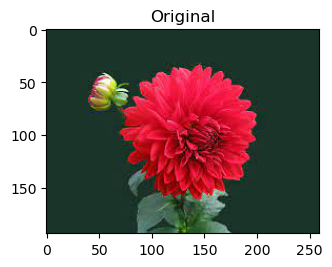

In [3]:
# Display original image
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(2, 4, 1)
plt.imshow(flower_image)
plt.title("Original")

plt.tight_layout()
plt.show()

In [4]:
# 1. Pixel
pixel_value = np.array(flower_image)[100, 100]
print("Pixel Value:", pixel_value)


Pixel Value: [249  29  67]


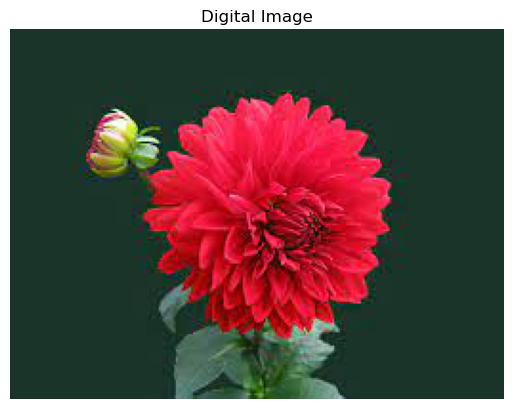

<Figure size 640x480 with 0 Axes>

In [5]:
# 2. Digital Image
plt.imshow(flower_image)
plt.title("Digital Image")
plt.axis('off')
plt.show()

plt.tight_layout()
plt.show()

In [6]:

# 3. Resolution
image_resolution = flower_image.size
print("Image Resolution:", image_resolution)


Image Resolution: (259, 194)


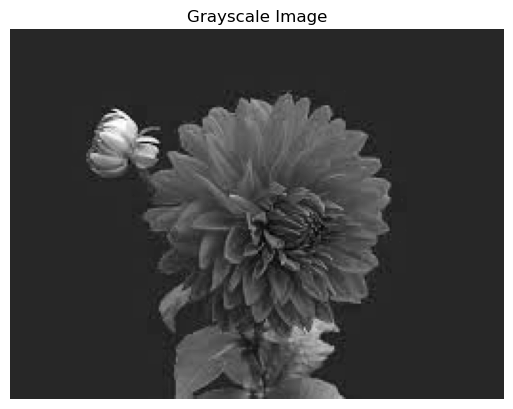

<Figure size 640x480 with 0 Axes>

In [7]:

# 4. Grayscale
grayscale_image = ImageOps.grayscale(flower_image)
plt.imshow(grayscale_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

plt.tight_layout()
plt.show()

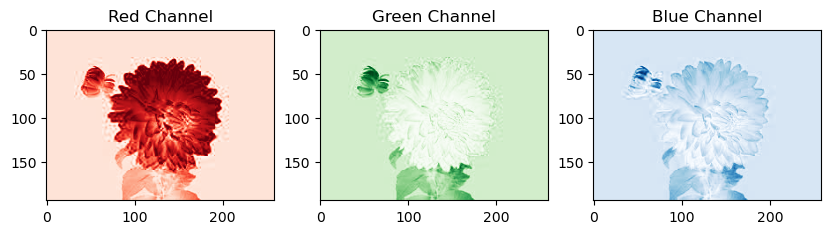

In [8]:

# 5. Color Spaces (RGB)
rgb_image = flower_image.convert("RGB")
r, g, b = rgb_image.split()
plt.figure(figsize=(10, 4))
plt.subplot(131), plt.imshow(r, cmap='Reds'), plt.title("Red Channel")
plt.subplot(132), plt.imshow(g, cmap='Greens'), plt.title("Green Channel")
plt.subplot(133), plt.imshow(b, cmap='Blues'), plt.title("Blue Channel")
plt.show()

Text(0, 0.5, 'Frequency')

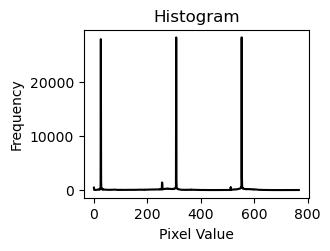

In [9]:
# 6. Histogram
histogram = flower_image.histogram()

# Histogram
plt.subplot(2, 2, 2)
plt.plot(histogram, color='black')
plt.title("Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")


Text(0.5, 1.0, 'Thresholding')

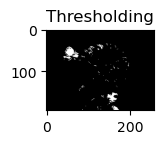

In [10]:
# 7. Thresholding
threshold = 128  # Example threshold value
thresholded_flower = grayscale_image.point(lambda p: p > threshold and 255)

# Thresholding
plt.subplot(2, 4, 3)
plt.imshow(thresholded_flower, cmap='gray')
plt.title("Thresholding")


Text(0.5, 1.0, 'Blurring')

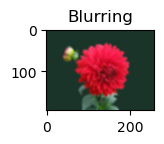

In [11]:
# 8. Convolution
kernel = ImageFilter.BLUR  # Example convolution kernel (blur)
convolved_flower = flower_image.filter(kernel)

# Convolution (Blurring)
plt.subplot(2, 4, 4)
plt.imshow(convolved_flower)
plt.title("Blurring")


Text(0.5, 1.0, 'Edge Detection')

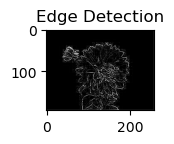

In [12]:
# 9. Edge Detection
edge_flower = grayscale_image.filter(ImageFilter.FIND_EDGES)

# Edge Detection
plt.subplot(2, 4, 5)
plt.imshow(edge_flower, cmap='gray')
plt.title("Edge Detection")

Text(0.5, 1.0, 'Eroded')

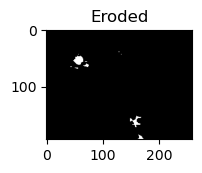

In [13]:
# 10. Morphological Operations (Erosion) using OpenCV
kernel = np.ones((3, 3), np.uint8)
eroded_flower = cv2.erode(np.array(thresholded_flower), kernel, iterations=1)

plt.subplot(1, 3, 3)
plt.imshow(eroded_flower, cmap='gray')
plt.title("Eroded")

Text(0.5, 1.0, 'Rotation')

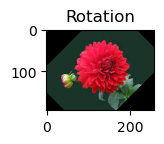

In [14]:
# 11. Image Transformation (Rotation)
rotated_flower = flower_image.rotate(45)  # Example rotation angle

# Image Transformation (Rotation)
plt.subplot(2, 4, 7)
plt.imshow(rotated_flower)
plt.title("Rotation")

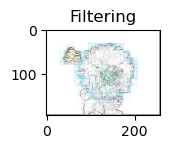

In [15]:
# 12. Image Filtering (Applying a filter)
filtered_flower = flower_image.filter(ImageFilter.CONTOUR)

# Image Filtering (Contour)
plt.subplot(2, 4, 8)
plt.imshow(filtered_flower)
plt.title("Filtering")

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Translated')

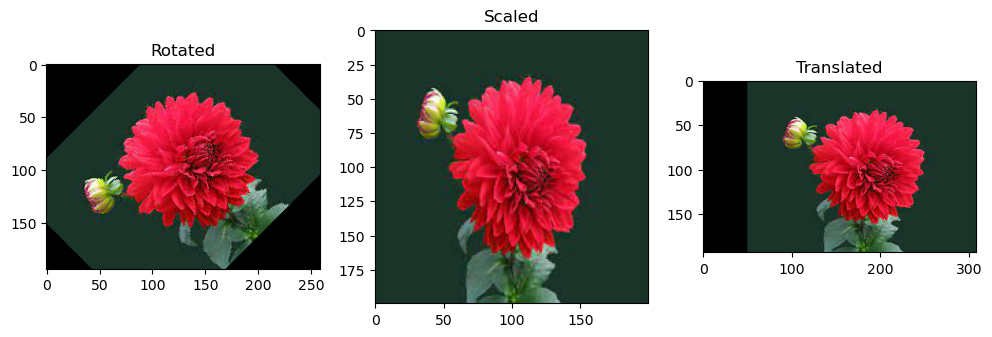

In [16]:
#13. Image Transformation (Rotation, Scaling, and Translation)
# Rotation
rotated_flower = flower_image.rotate(45)

# Display the images
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(rotated_flower)
plt.title("Rotated")


# Scaling
scaled_flower = flower_image.resize((200, 200))

plt.subplot(1, 3, 2)
plt.imshow(scaled_flower)
plt.title("Scaled")



# Translation
translated_flower = Image.new("RGB", (flower_image.width + 50, flower_image.height))
translated_flower.paste(flower_image, (50, 0))

plt.subplot(1, 3, 3)
plt.imshow(translated_flower)
plt.title("Translated")


Text(0.5, 1.0, 'Edge Detection')

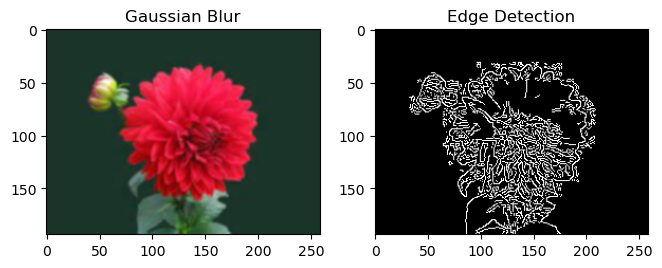

In [17]:
#14. Image Filtering (Applying Filters)
flower_array = np.array(flower_image)

# Gaussian Blur
blurred_flower = cv2.GaussianBlur(flower_array, (5, 5), 0)

# Display the images
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(blurred_flower)
plt.title("Gaussian Blur")

# Edge Detection (Canny)
edges_flower = cv2.Canny(flower_array, 100, 200)

plt.subplot(1, 3, 2)
plt.imshow(edges_flower, cmap='gray')
plt.title("Edge Detection")




Text(0.5, 1.0, 'Harris Corners')

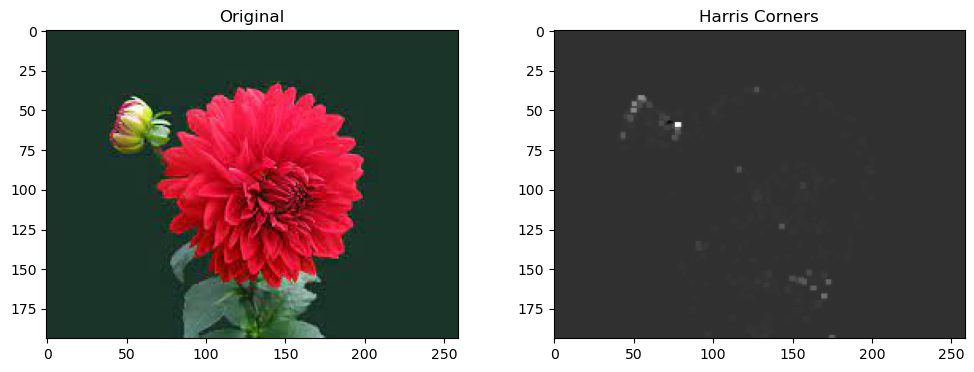

In [18]:
# 15. Feature Extraction 
gray_flower = cv2.cvtColor(flower_array, cv2.COLOR_BGR2GRAY)
gray_flower = np.float32(gray_flower)

# Display the images
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

plt.imshow(flower_array)
plt.title("Original")

#(Harris Corner Detection)
harris_corners = cv2.cornerHarris(gray_flower, 2, 3, 0.04)
harris_corners = cv2.dilate(harris_corners, None)

plt.subplot(1, 2, 2)
plt.imshow(harris_corners, cmap='gray')
plt.title("Harris Corners")



C:\Users\AB\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Segmented')

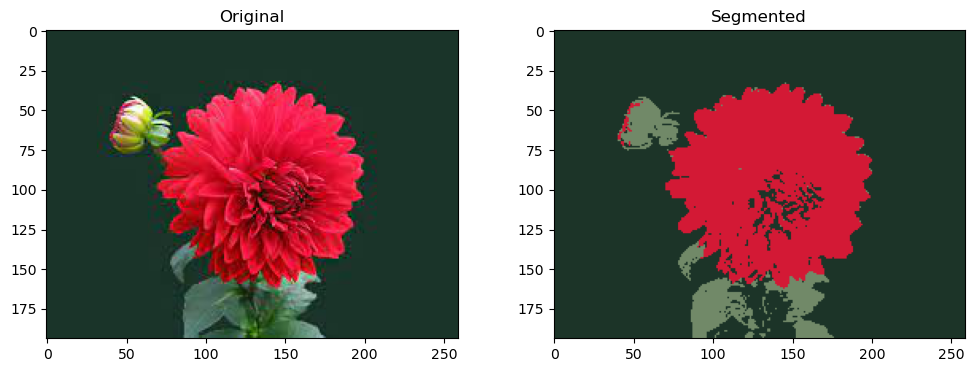

In [19]:
# 16. Image Segmentation (K-Means Clustering)

# Flatten the image array
flat_flower = flower_array.reshape((-1, 3))

# Display the images
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(flower_array)
plt.title("Original")

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(flat_flower)
segmented_flower = kmeans.cluster_centers_.astype(int)[kmeans.labels_].reshape(flower_array.shape)

plt.subplot(1, 2, 2)
plt.imshow(segmented_flower)
plt.title("Segmented")




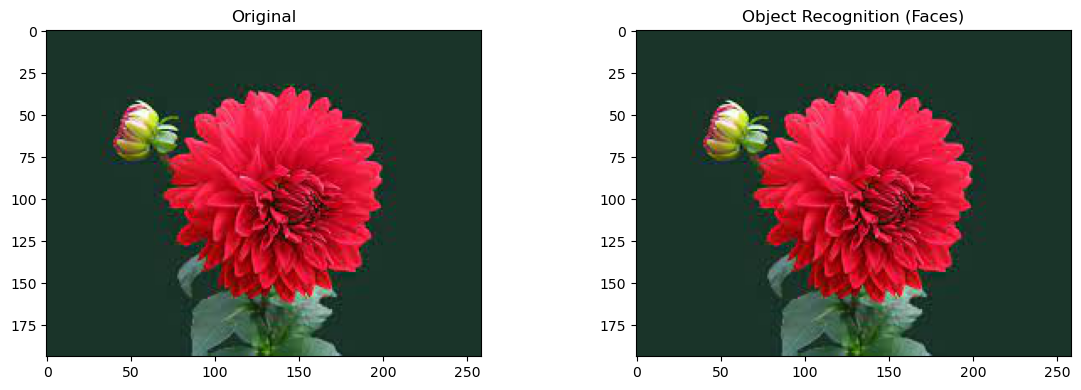

In [20]:
# 17. Object Recognition (Haarcascades for Face Detection)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Convert to grayscale
gray_flower = cv2.cvtColor(flower_array, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray_flower, scaleFactor=1.3, minNeighbors=5)

# Draw rectangles around the faces
flower_with_faces = flower_array.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(flower_with_faces, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Display the images
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(flower_array)
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(flower_with_faces)
plt.title("Object Recognition (Faces)")

plt.tight_layout()
plt.show()


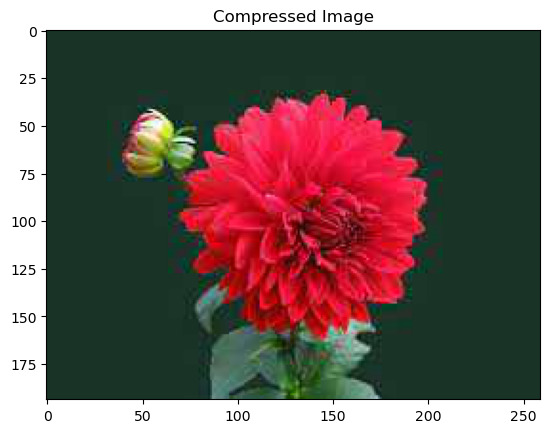

In [21]:
# 18. Image Compression
compressed_image_path = "compressed_flower.jpg"
flower_image.save(compressed_image_path, quality=50)

# Display the compressed image
compressed_image = Image.open(compressed_image_path)
plt.imshow(compressed_image)
plt.title("Compressed Image")
plt.show()


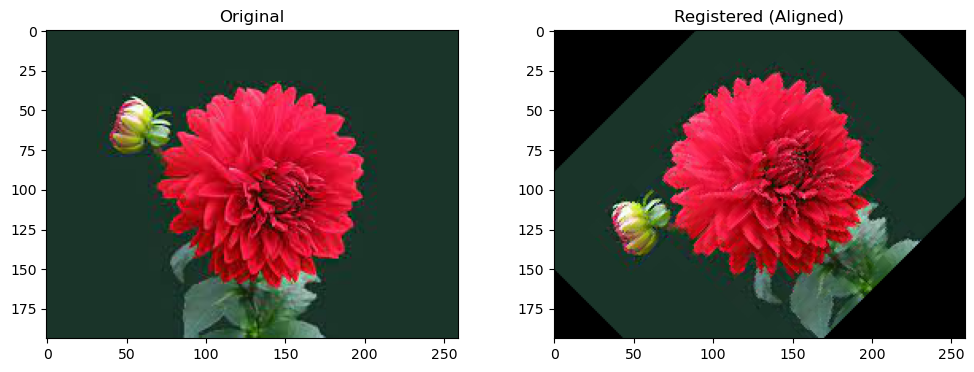

In [22]:
# 19. Image Registration (Aligning Multiple Images)
registered_flower = rotated_flower.resize(flower_image.size)

# Display the images
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(flower_image)
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(registered_flower)
plt.title("Registered (Aligned)")
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


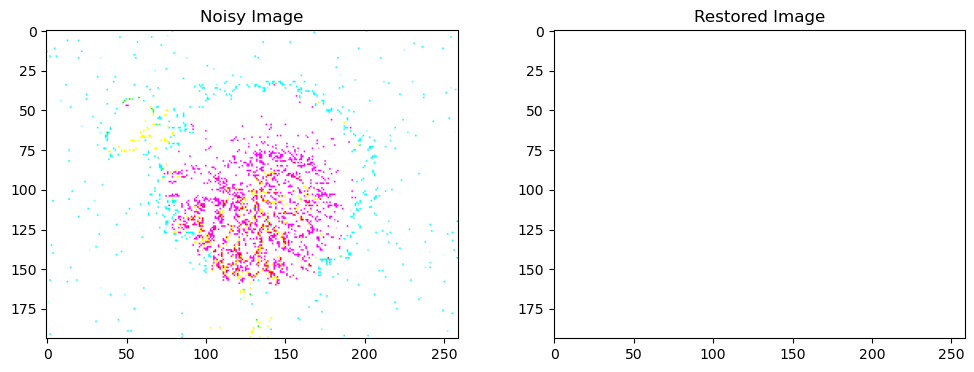

In [23]:
# 20. Image Restoration (Removing Noise)
from scipy.ndimage import gaussian_filter

noisy_flower = flower_array + 10 * np.random.normal(size=flower_array.shape)
restored_flower = gaussian_filter(noisy_flower, sigma=1)

# Display the images
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(noisy_flower)
plt.title("Noisy Image")

plt.subplot(1, 2, 2)
plt.imshow(restored_flower)
plt.title("Restored Image")
plt.show()


C:\Users\AB\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


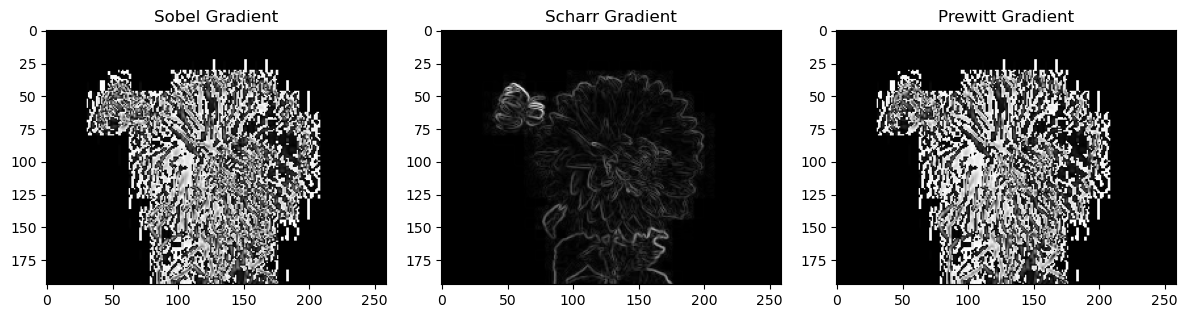

In [24]:
# 21. Image Gradients (Sobel, Scharr, Prewitt)
from scipy.ndimage import sobel, prewitt
from skimage.filters import scharr

gradient_sobel = sobel(gray_flower)
gradient_scharr = scharr(gray_flower)
gradient_prewitt = prewitt(gray_flower)

# Display the images
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(gradient_sobel, cmap='gray')
plt.title("Sobel Gradient")

plt.subplot(1, 3, 2)
plt.imshow(gradient_scharr, cmap='gray')
plt.title("Scharr Gradient")

plt.subplot(1, 3, 3)
plt.imshow(gradient_prewitt, cmap='gray')
plt.title("Prewitt Gradient")

plt.tight_layout()
plt.show()


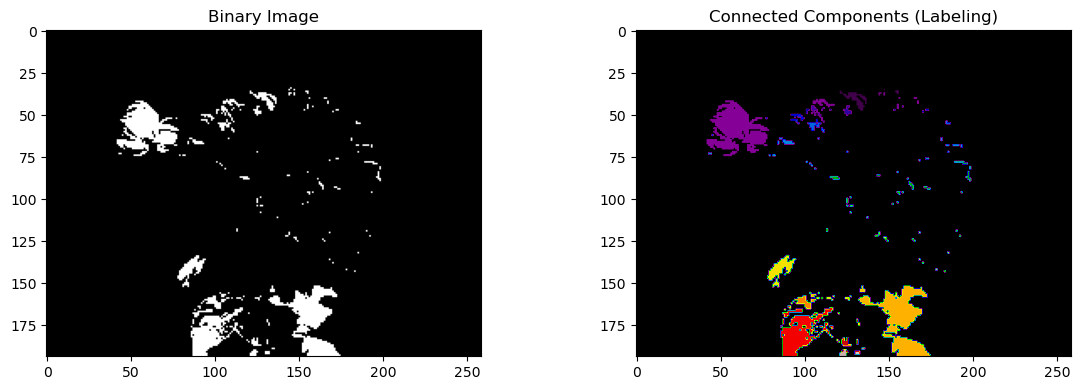

In [25]:
# 22. Connected Components (Labeling)
from skimage.measure import label, regionprops

# Convert to binary
binary_flower = gray_flower > 100

# Label connected components
labeled_image = label(binary_flower)
regions = regionprops(labeled_image)

# Display the images
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(binary_flower, cmap='gray')
plt.title("Binary Image")

plt.subplot(1, 2, 2)
plt.imshow(labeled_image, cmap='nipy_spectral')
plt.title("Connected Components (Labeling)")

plt.tight_layout()
plt.show()


C:\Users\AB\AppData\Local\Temp\ipykernel_17292\1366099423.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
C:\Users\AB\AppData\Local\Temp\ipykernel_17292\1366099423.py:21: RuntimeWarning: divide by zero encountered in scalar divide
  y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)


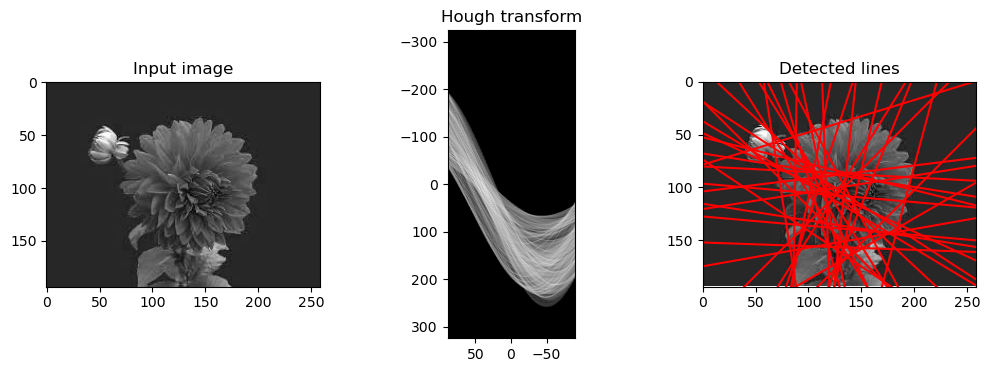

In [29]:
from skimage import feature

image = np.array(flower_image.convert('L'))  # Convert to grayscale
edges = feature.canny(image, sigma=2)
h, theta, d = hough_line(edges)

# Display the result
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.imshow(np.log(1 + h),
           extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
           cmap=plt.cm.gray, aspect=1/1.5)
ax2.set_title('Hough transform')

ax3.imshow(image, cmap=plt.cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax3.plot((0, image.shape[1]), (y0, y1), '-r')
ax3.set_xlim((0, image.shape[1]))
ax3.set_ylim((image.shape[0], 0))
ax3.set_title('Detected lines')

plt.show()


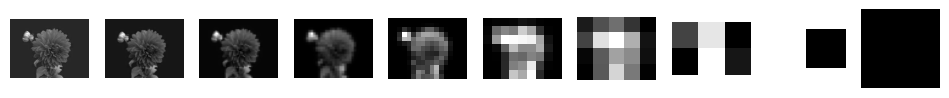

In [27]:
#24. Image Pyramids
from skimage import transform

# Generate Gaussian pyramid
pyramid = tuple(transform.pyramid_gaussian(image, downscale=2))

# Display the pyramid
fig, axes = plt.subplots(1, len(pyramid), figsize=(12, 4))
for img, ax in zip(pyramid, axes):
    ax.imshow(img, cmap=plt.cm.gray)
    ax.axis('off')
plt.show()


In [ ]:
from skimage.feature import Cascade
import requests
from io import BytesIO

# Download the Haar cascade XML file
url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"
response = requests.get(url)
xml_data = BytesIO(response.content)

# Load pre-trained face detector
face_cascade = Cascade(xml_data)

# Perform face detection on the image
faces = face_cascade.detect_multi_scale(image)

# Display the result
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

# Plot the detected faces
for face in faces:
    rect = plt.Rectangle((face[1], face[0]), face[3] - face[1], face[2] - face[0], linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show()


C:\Users\AB\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
